In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('diabetes.csv')

In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Describe

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

## EDA

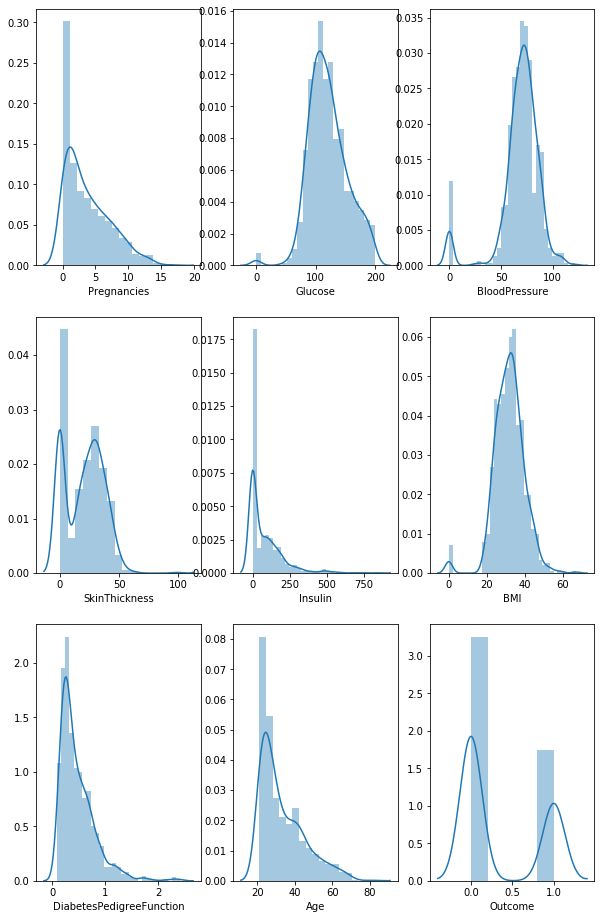

In [7]:
plt.figure(figsize=(10,50))
j = 1
for i in range(8):
    plt.subplot(9,3,j)
    sns.distplot(df[cols[i]])
    j+=1
plt.subplot(9,3,9)
sns.distplot(df.Outcome)

500 268


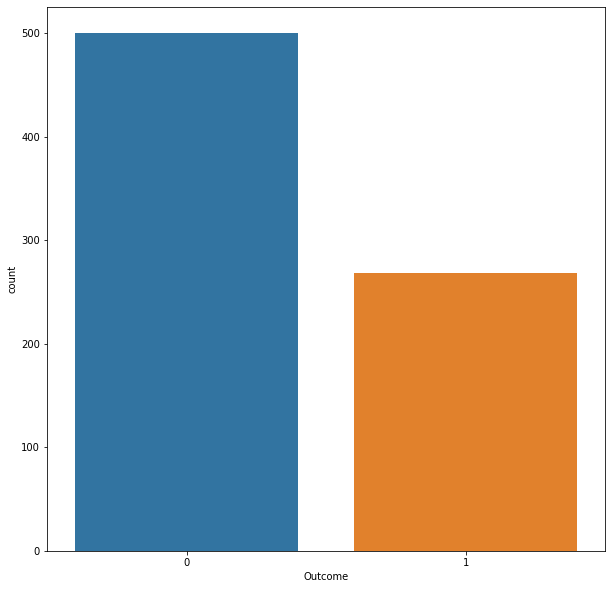

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(df.Outcome,label='count')
a,b = df['Outcome'].value_counts()
print(a,b)

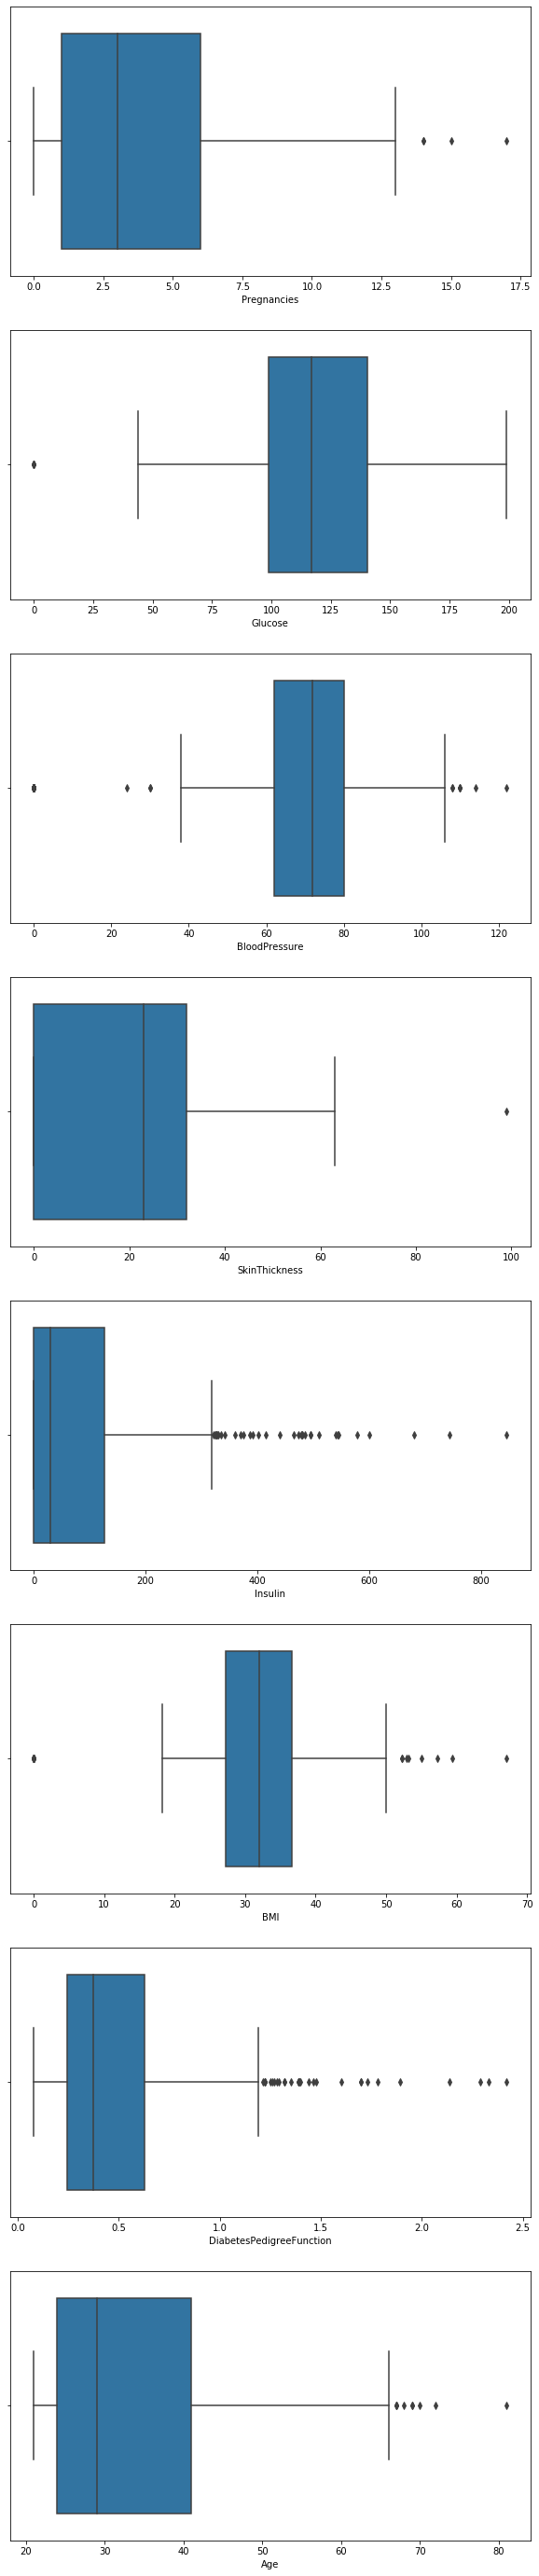

In [9]:
plt.figure(figsize=(10,50))
j = 1
for i in range(8):
    plt.subplot(8,1,j)
    sns.boxplot(x=df[cols[i]])
    j+=1

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


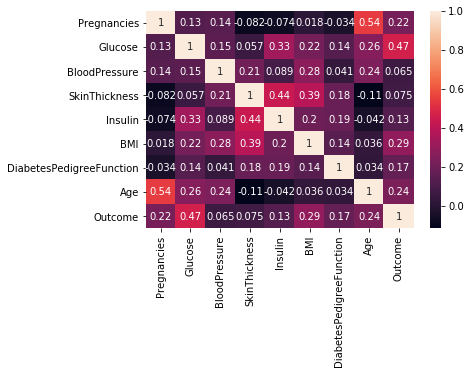

In [11]:
sns.heatmap(df.corr(),annot=True)

<Figure size 504x720 with 0 Axes>

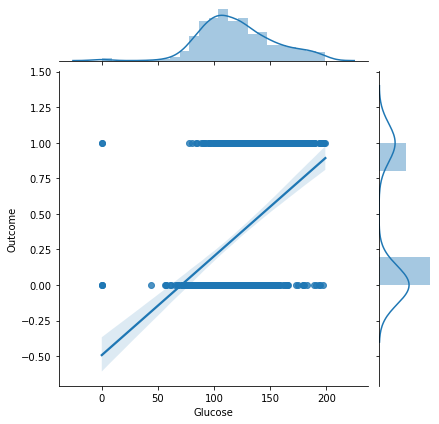

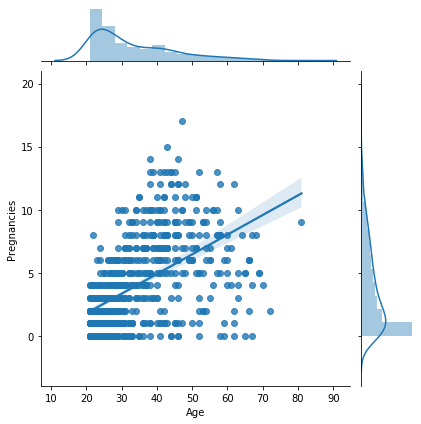

In [12]:
plt.figure(figsize=(7,10))

sns.jointplot(df['Glucose'],
              df['Outcome'],
             kind='regg')
sns.jointplot(df['Age'],
             df['Pregnancies'],
             kind='regg')

## Modelling

In [13]:
X = df.iloc[:,:8]

y = df.loc[:,'Outcome']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:5,:]

array([[ 1.50755225, -1.01521454, -0.40451932, -1.31921491, -0.71823753,
        -1.22070104, -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602,  0.9287299 ,  0.08374747,
         0.13719053, -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, -1.31921491, -0.71823753,
         0.0240329 ,  0.39884168, -0.5489355 ],
       [ 2.38408331,  0.59492164,  0.64836422,  1.36583027,  2.05458297,
         0.87900167,  0.17903049,  2.03592532],
       [ 1.50755225,  0.75277813,  0.54307587,  1.55315901,  0.39089067,
         0.71555175,  0.50724171,  0.53503839]])

In [16]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_train)
y_pred1

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [17]:
print(accuracy_score(y_train,y_pred1))

0.6510416666666666


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
366,6,124,72,0,0,27.6,0.368,29
301,2,144,58,33,135,31.6,0.422,25
382,1,109,60,8,182,25.4,0.947,21
140,3,128,78,0,0,21.1,0.268,55


In [19]:
X_test = scaler.transform(X_test)
X_test[:5,:]

array([[-0.82986389,  2.4576282 ,  0.33249916,  1.36583027, -0.71823753,
         1.34420526,  2.78665365, -0.96584853],
       [-0.53768687, -0.44693118,  0.2272108 ,  0.55407243,  0.13493801,
         0.17490974, -0.19434743, -0.88246592],
       [ 0.04666716, -1.42564141, -0.40451932, -1.31921491, -0.71823753,
         0.22520202, -0.23349189, -0.71570071],
       [ 0.33884418,  1.41577538,  0.12192245, -0.13279959,  0.77481966,
        -0.80578973,  0.3566861 ,  1.45224707],
       [-1.12204091, -0.32064599, -0.24658679, -1.31921491, -0.71823753,
        -0.95666657,  0.5764973 , -0.21540507]])

In [20]:
for k in ('linear','poly','rbf','sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    print(k,": ", accuracy_score(y_train,y_pred))

linear :  0.7638888888888888
poly :  0.7934027777777778
rbf :  0.8246527777777778
sigmoid :  0.6510416666666666


In [21]:
clf = svm.SVC(kernel='rbf')
X_test = scaler.transform(X_test)
clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6875


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81       130
           1       0.57      0.13      0.21        62

    accuracy                           0.69       192
   macro avg       0.63      0.54      0.51       192
weighted avg       0.66      0.69      0.61       192



In [23]:
#Example :
import numpy as np
patient = np.array([X_test[1]])
patient = scaler.transform(patient)

pred = clf.predict(patient)

print(pred)
print(y_test)

[0]
661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64


In [24]:
#Patient Check
k = 1
patient = np.array([X_test[k]])
pred = clf.predict(patient)

print(pred)
print(y_test[k])

[0]
0


In [25]:
X_train

array([[ 1.50755225, -1.01521454, -0.40451932, ..., -1.22070104,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602, ...,  0.13719053,
        -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, ...,  0.0240329 ,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.85735805, -0.24658679, ..., -0.9440935 ,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.14149973,  0.2272108 , ..., -0.26514771,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46863645,  0.64836422, ..., -4.04964181,
         0.51627505,  2.953134  ]])

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [33]:
patient = np.array([[6,148,72,35,0,33.6,0.627,50]])
patient = scaler.transform(patient)

In [34]:
patient

array([[ 0.6310212 ,  0.84749202,  0.12192245,  0.86628699, -0.71823753,
         0.17490974,  0.47713059,  1.36886446]])

In [37]:
predict = clf.predict(patient)
predict

array([0])